# Stochastic

In the beginning of the modern era of finance, mainly in the 1970s and 1980s, the major goal of financial research was to come up with closed-form solutions, for, e.g., option prices given a specific financial model. The requirements have drastically changed in recent years in that not only is the correct valuation of single financial instuments important to participants in the financial markets, but also the consistent valuation of whole derivatives books. To come up with risk measures across a whole financial institution, like value-at-risk and credit valuation adjustments, one needs to take into account the whole book of the institution and all its counterparty.

## Random Numbers

In [1]:
# import packages

import math
import numpy as np
import numpy.random as npr      # import the random number generation subpackage from NumPy
from pylab import plt, mpl
import seaborn as sns

sns.set()
mpl.rcParams['font.family'] = 'serif'

%matplotlib inline

The `rand()` function returns random numbers from the open interval [0, 1) in the shape provided as a parameter to the function. The return pbject is an ndarray object.

In [2]:
# if one wants to generate from numbers from the interval [a, b)=[5, 10), one can transform the returned numbers from npr.rand()

npr.seed(100)           # Fixes the seed value for reproducibility
np.set_printoptions(precision=4) 

npr.rand(10)            # Uniformly distributed random numbers as one-dimensional ndarray object


array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [3]:
npr.rand(5, 5)      # Uniformly distributed random numbers as two-dimensional ndarray object

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

In [4]:
a = 5.          # lower limit
b = 10.         # and upper limit

In [5]:
npr.rand(10) * (b - a) + a      # for the transformation to another interval

array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

In [6]:
npr.rand(5, 5) * (b - a) + a    # the same transformation for two dimensions

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

<b>Functions for single random number generation</b>
<table>
<tr>
    <th>Functions</th>
    <th>Parameters</th>
    <th>Returns/result</th>
</tr>
<tr>
    <td>rand </td>
    <td>d1, d1, ..., dn</td>
    <td>Random values in the given shape</td>
</tr>
<tr>
    <td>randn</td>
    <td>d0, d1, ..., dn</td>
    <td>A sample (or samples) from the standard normal distribution</td>
</tr>
<tr>
    <td>randint</td>
    <td>low[, high, size]</td>
    <td>Random integers from low (inclusive) to high (exlusive)</td>
</tr>
<tr>
    <td>random_integers</td>
    <td>low[, high, size]</td>
    <td>Random intergers between low and high inclusive</td>
</tr>
<tr>
    <td>random_sample</td>
    <td>[size]</td>
    <td>Random floats in the half-open interval [0.0, 1.0)</td>
</tr>
<tr>
    <td>random</td>
    <td>[size]</td>
    <td>Random floats in the half-open interval [0.0, 1.0)</td>
</tr>
<tr>
    <td>ranf</td>
    <td>[size]</td>
    <td>Random floats in the half-open interval [0.0, 1.0)</td>
</tr>
<tr>
    <td>sample</td>
    <td>[size]</td>
    <td>Random floats in the half-open interval [0.0, 1.0)</td>
</tr>
<tr>
    <td>choice</td>
    <td>a[, size, replace, p]</td>
    <td>Random sample from a given 1D array</td>
</tr>
<tr>
    <td>bytes</td>
    <td>length</td>
    <td>Random bytes</td>
</tr>
</table>

Figrue below shows the results graphically for two continuous distributions and two discrete ones.

In [7]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)          # Uniformly distributed random numbers
rn2 = npr.randint(0, 10, sample_size)   # Random integers for a given interval
rn3 = npr.sample(size=sample_size)      # Unifromly distributed random numbers

a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)   # Randomly sampled values from a finite list object

Text(0.5, 1.0, 'choice')

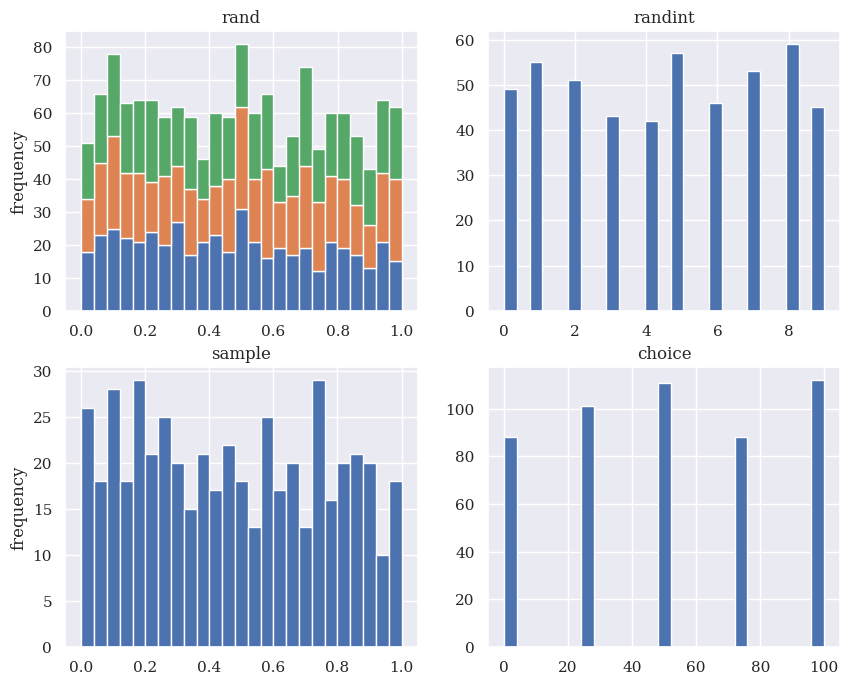

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice')

<b>Functions to generate random numbers according to different distribution laws</b>

<table>
<tr>
    <th>Functions</th>
    <th>Parameters</th>
    <th>Returns/result</th>
</tr>
<tr>
    <td>beta</td>
    <td>a, b[, size]</td>
    <td>Samples for a beta distribution over [0, 1]</td>
</tr>
<tr>
    <td>binomial</td>
    <td>n, p[, size]</td>
    <td>Sample from a binomial distribution</td>
</tr>
<tr>
    <td>chisquare</td>
    <td>df[, size]</td>
    <td>Samples from a chi-square distribution</td>
</tr>
<tr>
    <td>dirichlet</td>
    <td>alpha[, size]</td>
    <td>Samples from the Dirichlet distribution</td>
</tr>
<tr>
    <td>exponential</td>
    <td>[scale, size]</td>
    <td>Samples from the exponential distribution</td>
</tr>
<tr>
    <td>f</td>
    <td>dfnum, dfden[, size]</td>
    <td>Samples from an F distribution</td>
</tr>
<tr>
    <td>gamma</td>
    <td>shape[, scale, size]</td>
    <td>Samples from a gamma distribution</td>
</tr>
<tr>
    <td>geometric</td>
    <td>p[, size]</td>
    <td>Samples form the geometric distribution</td>
</tr>
<tr>
    <td>gumbel</td>
    <td>[loc, sacle, size]</td>
    <td>Samples from a Gumbel distribution</td>
</tr>
<tr>
    <td>hypergeometric</td>
    <td>ngood, nbad, nsample[, size]</td>
    <td>Samples from a hyper geometric distribution</td>
</tr>
<tr>
    <td>laplace</td>
    <td>[loc, scale, size]</td>
    <td>Samples from the Laplace or double exponential distribution</td>
</tr>
<tr>
    <td>logistic</td>
    <td>[loc, scale, size]</td>
    <td>Samples from a logistic distribution</td>
</tr>
<tr>
    <td>lognormal</td>
    <td>[mean, sigma, size]</td>
    <td>Sample from a log-normal distribution</td>
</tr>
<tr>
    <td>logseries</td>
    <td>p[, size]</td>
    <td>Sample from a logarithmic series distribution</td>
</tr>
<tr>
    <td>multinomian</td>
    <td>n, pvals[, size]</td>
    <td>Samples from a multinomial distribution</td>
</tr>
<tr>
    <td>multivariate_normal</td>
    <td>mean, cov[, size]</td>
    <td>Samples from a multivariate normal distribution</td>
</tr>
<tr>
    <td>negative_binomial</td>
    <td>n, p[, size]</td>
    <td>Samples from a negative binomial distribution</td>
</tr>
<tr>
    <td>noncentral_chisquare</td>
    <td>df, nonc[, size]</td>
    <td>Samples from a noncentral chi-square distribution</td>
</tr>
<tr>
    <td>noncentral_f</td>
    <td>dfnum, dfden,</td>
    <td>Samples from the nonceltral F distribution</td>
</tr>
<tr>
    <td>normal</td>
    <td>[loc, scale, size]</td>
    <td>Samples from a normal (Gaussian) distribution</td>
</tr>
<tr>
    <td>pareto</td>
    <td>a[, size]</td>
    <td>Samples from a Pareto II or Lomax distribution with the specified shape
</tr>
    <td>poisson</td>
    <td>a[, size]</td>
    <td>Samples from a Poisson distribution</td>
<tr>
    <td>power</td>
    <td>a[, size]</td>
    <td>Sample in [0, 1] from a powewr distribution with positive exponent a - 1</td>
</tr>
<tr>
    <td>rayleigh</td>
    <td>[scale, size]</td>
    <td>Samples from a Rayleigh distribution</td>
</tr>
<tr>
    <td>standard_cauchy</td>
    <td>[size]</td>
    <td>Samples from standard Cauchy distribution with mode = 0</td>
</tr>
<tr>
    <td>standard_exponential</td>
    <td>[size]</td>
    <td>Samples from the standard exponential distribution</td>
</tr>
<tr>
    <td>standard_gamma</td>
    <td>shape[, size]</td>
    <td>Samples from a standard gamma distribution</td>
</tr>
<tr>
    <td>standard_normal</td>
    <td>[size]</td>
    <td>Samples from a standard normal distribution (mean = 0, stdev=1)</td>
</tr>
<tr>
    <td>standrd_t</td>
    <td>df[, size]</td>
    <td>Samples from a Student's t distribution with df degrees of freedom</td>
</tr>
<tr>
    <td>triangular</td>
    <td>left, mode, right[, size]</td>
    <td>Samples from the triangular distribution over the interval [left, right]</td>
</tr>
<tr>
    <td>uniform</td>
    <td>[low, high, size]</td>
    <td>Samples from a uniform distribution</td>
</tr>
<tr>
    <td>vomises</td>
    <td>mu, kappap[, size]</td>
    <td>Samples from a von Mises distribution</td>
</tr>
<tr>
    <td>wald</td>
    <td>mean, scale[, size]</td>
    <td>Samples froem a Wald, or inverse Gaussian, distribution</td>
</tr>
<tr>
    <td>weibull</td>
    <td>a[, size]</td>
    <td>Samples from a Weibull distribution</td>
</tr>
<tr>
    <td>zipf</td>
    <td>a[, size]</td>
    <td>Samples from a Zipf distribution</td>
</tr>
</table>

Although there is much cirticism aroung the use of (standard) normal distributions in finance, they are an indispensalbe tool and still the most widely used type of distribution.

Figure below visualizes rnadom draws from the following distributions:

- Standard normal with mean of 0 and standard deviation of 1

- Normal with mean of 100 and standard deviation of 20

- Chi square with 0.5 degree of freedom

- Poisson with lambda of 1

Three of them are continuous distribution but Poisson is discrete one. The Poisson distribution is used to simulate the arrival of (rare) external events, like a jump in the price of an instrument or an exogenic shock.

Text(0.5, 1.0, 'Poisson')

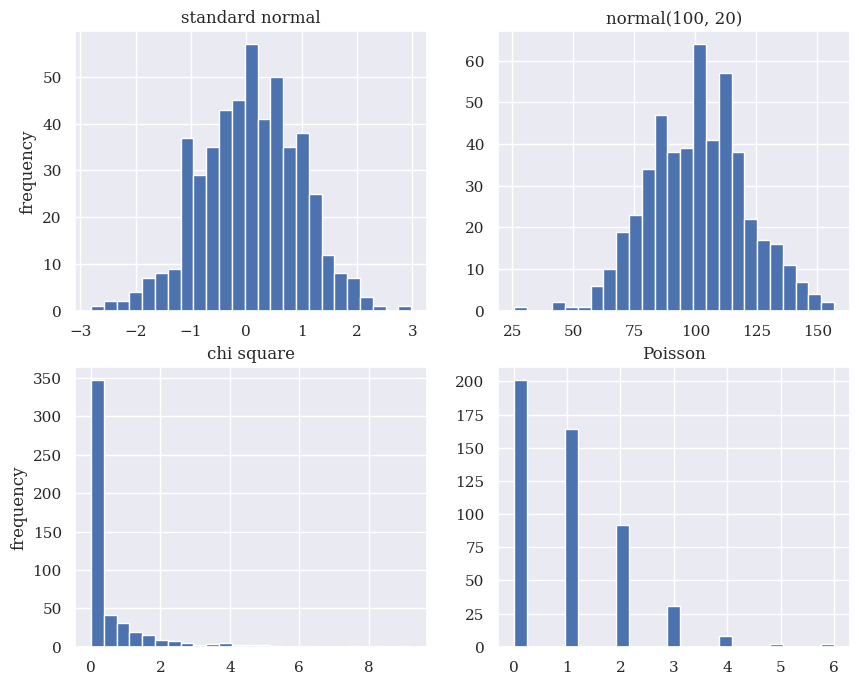

In [9]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)          # standard normally distributed random numbers
rn2 = npr.normal(100, 20, sample_size)          # Normally distributed random numbers
rn3 = npr.chisquare(df=0.5, size=sample_size)   # Chi-square disttributed random numbers
rn4 = npr.poisson(lam=1.0, size=sample_size)    # Poisson distributed numbers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')

ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')

ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')

ax4.hist(rn4, bins=25)
ax4.set_title('Poisson')

## Simulation

Monte Carlo simulation (MCS) is among the most important numerical technikques in finance.

### Random Variables

Consider the Black-Scholes-Merton setup for otpion pricing. The level of a stock index $S_T$ at a future date $T$ given a level $S_0$ as of today is given accoring to equation below.

<b>Simulating future index level in Black-Scholes-Merton setup</b>
$$S_T=S_0\exp{\left((r-\frac{1}{2}\sigma^2)T+\sigma\sqrt{T}z\right)}$$

$S_T$ : index level at date $T$

$r$ : constant riskless short rate

$\sigma$ : constant volatility (= standard deviation of returens) os $S$

$z$ : Standard normally distributed random variable

In [10]:
S0 = 100            # the initial index level
r = 0.05            # the constant riskless short rate
sigma = 0.25        # the constant volatility factor
T = 2.0             # The horizon in year fraction
I = 10000           # The number of simulations

ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * npr.standard_normal(I))
# The simulation itself via a vectorized expression; the discretization scheme makes use of the `npr.standard_normal()`

Text(0, 0.5, 'frequency')

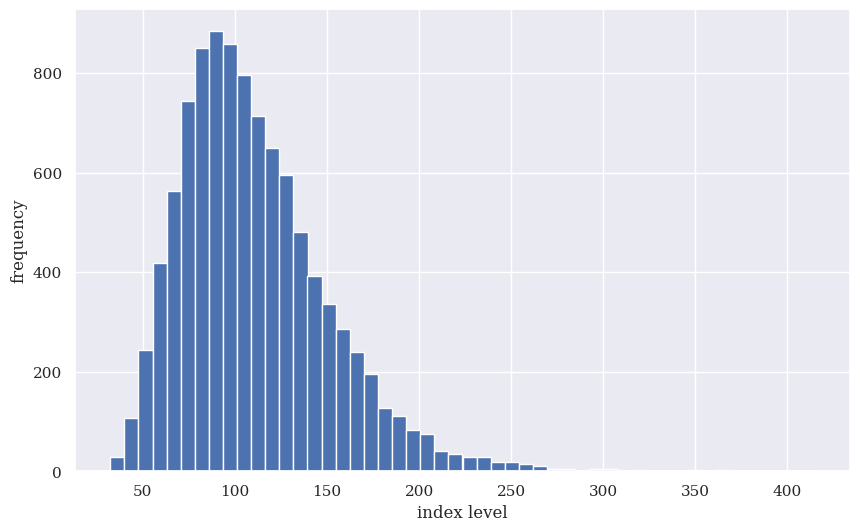

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

Figure above suggests that the distribution of the random variable is log-normal. One could therefore also try to use the `npr.lognormal()` function to directly derive the values for the random variable.

In [18]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T, sigma * math.sqrt(T), size=I)  
# The simulation itself via a vectorized expression; the discretization scheme makes use of the `npr.lognormal()`

Text(0, 0.5, 'frequency')

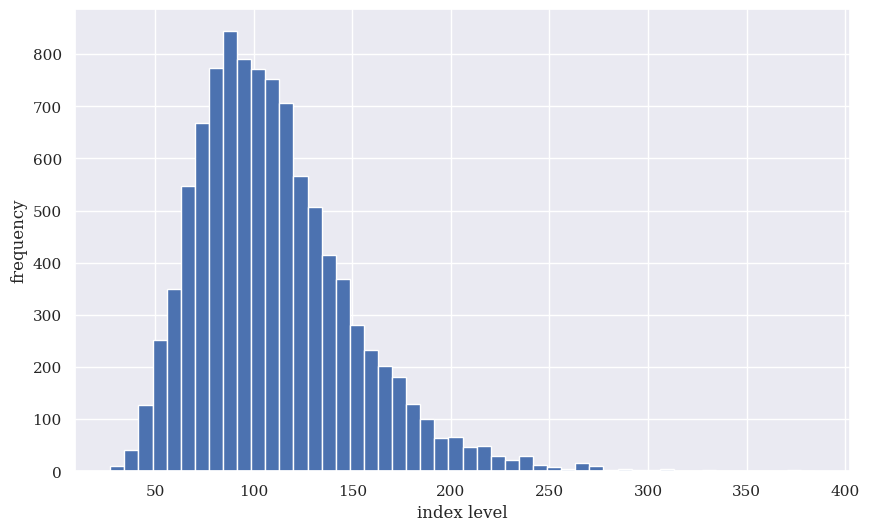

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

To compare the distributional characteristics of simulation results, the `scipy.stats` subpackage and the helper function `print_statistics()` prove useful.

In [21]:
import scipy.stats as scs

def print_statistics(a1, a2):
    ''' Prints selected statistics.

    Parameters
    ==========
    a1, a2 : ndarray objects 
        results objects from simulation

    '''

    sta1 = scs.describe(a1)         # the scs.describe() function gives back important statistics for a data set.  
    sta2 = scs.describe(a2)         

    print('%14s %14s %14s' % ('statistics', 'data set 1', 'data set 2'))
    print(45 * '-')
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

    # Skewness is a measure of the degree of asymmetry in a distribution. A perfectly symmetrical distribution has zero skewness. If a distribution has a longer tail on the right side, it is said to be positively skewed, while a longer tail on the left side indicates negative skewness.
    # Kurtosis measures the degree of peakedness or flatness of a distribution. A normal distribution has a kurtosis of 3, and a distribution with a kurtosis greater than 3 is said to be leptokurtic, meaning it has a more peaked distribution. A distribution with a kurtosis less than 3 is said to be platykurtic, indicating a flatter and wider distribution.
    # Normality is a property of a distribution where the data is symmetric and bell-shaped, with the mean, median, and mode all being equal.

In [22]:
print_statistics(ST1, ST2)

    statistics     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         32.327         27.105
           max        414.825        384.605
          mean        110.730        110.230
           std         40.300         40.085
          skew          1.122          1.152
      kurtosis          2.438          2.529


The statistics of both simulation results are quite similar. The differences are mainly due to what is called the sampling error in simulation. Another error can also be introduced when discretely simulating continuous stochastic processes - namely the discretization error, which plays no role here due to the static nature of the simulation approach.

### Stochastic Processes

A stochastic process is a sequence of random variables. One should expect something similar to a sequence of repeated simulatons of a random variable when simulating a process. This is mainly true, apart from the fact that the draws are typically not independent byt rather depend on the results of the provious draws. In general, however, stochastic processes used in finance exhibits the Markov property, which mainly says that tomorrow's value of the process only depends on today's state of the process, and not any other more 'historic' state or even the whole path history.

#### Geometric Brownian motion

Consider now the Black-Schole-Merton model in its dynamic form as described by the stochastic differential equation (SDE) as below. The SDE is called a geometric Brownian motion.

<b>Stochastic differential equation in Black-Scholes-Merton setup</b>

$$dS_t = rS_tdt + \sigma S_dZ_t$$

$dS_t$ : the change in the price of the asset over a short period of time

$S_t$ : the current price of the asset

$r$ : the expected return on the asset

$dt$ : the length of the time interval

$\sigma$ : the volatility of the asset

$Z_t$ : stanadard Brownian motion

$dZ_t$ : a random variable representing the change in the asset's value, which is assumed to follow a normal distribution.

The values of $S_t$ are log-normally distributed and returns $\frac{dS_t}{S_t}$ normally. The first term $rS_tdt$, represents the deterministic component of model, which is the expected return on the asset over a given time period. The second term, $\sigma S_dz_t$, represents the stochastic of the model, which is the random fluctuation in the asset's value over the same period time.

The GBM model assumes that the stochastic component of the model follows a normal distribution with a mean of zero and a standard deviation of $\sigma$. This means that the asset's value will fluctuate randomly around its expected return, with larger fluctuation occuring when the asset is more volatile.

The SDE in equation aboce can be discretized exactly by an Euler scheme, with $\triangle t$ being the fixed discretization intervsal and $z_t$ being a standard normally distributed random variable.

<b>Simulating index levels dynamically in Black-Scholes-Merton setup</b>
$$S_t = S_{t-\triangle t}\exp\left((r-\frac{1}{2}\sigma^2)\triangle t+\sigma\sqrt{\triangle t}z_t\right)$$

In [23]:
I = 10000           # The number of paths to be simulated
M = 50              # The number of time intervals for the discretization
dt = T / M          # The length of the time interval in year fractions
S = np.zeros((M + 1, I))    # The two-dimensional ndarray object for the index levels
S[0] = S0           # The initial values for the initial point in time t = 0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * npr.standard_normal(I))
    # The simulation via semivectorized expression; the loop is over the points in time starting at t = 1 and ending at t = T

Text(0, 0.5, 'frequency')

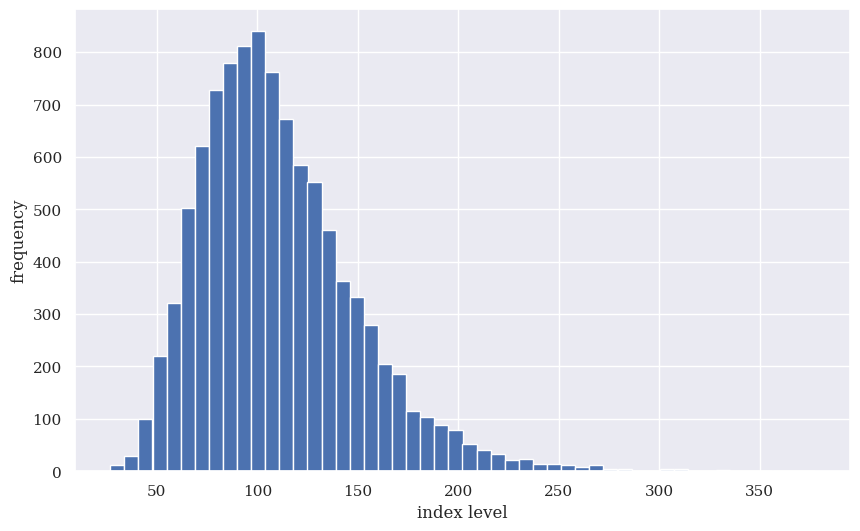

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [25]:
print_statistics(S[-1], ST2)

    statistics     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         26.850         27.105
           max        377.319        384.605
          mean        110.415        110.230
           std         39.106         40.085
          skew          1.065          1.152
      kurtosis          2.096          2.529


Text(0, 0.5, 'index level')

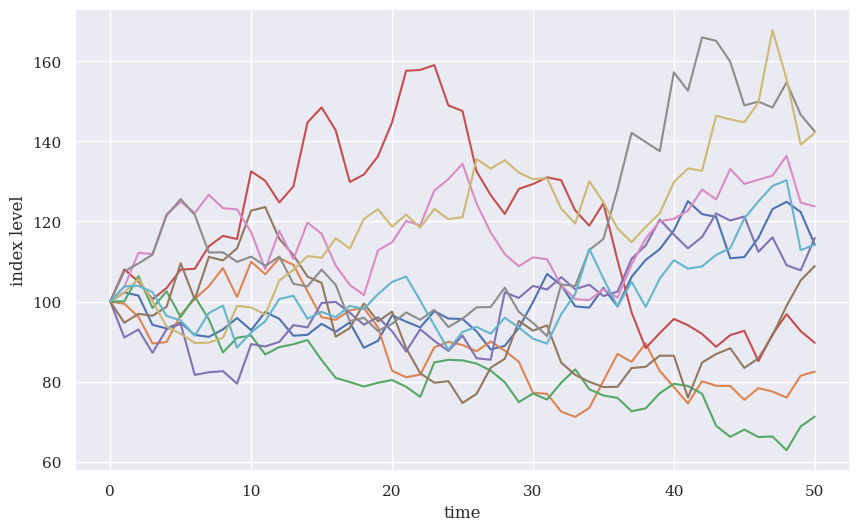

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

Using the dynamic simulation approach not only allows us to visualize pahts, but also to value options with Americal/Bermudan exercise or options whose payoff is path-dependent.

#### Square-root diffusion

Another important class of financial processes is mean-reverting processes, which are used to model short rates or voilatility processes. A popular and widely used model is the square-root diffusion.

* Mean-revering process refers to a tendency for a series to return to a long-term average or mean value after experiencing a temporary deviation from that value.

<b>Stochastic differential equation for square-root diffusion</b>

$$dx_t=\kappa(\theta-x_t)dt +\sigma\sqrt{x_t}dZ_t$$

$x_t$ : process level at date $t$

$\kappa$ : mean-revering factor

$\theta$ : long-term mean of the process

$\sigma$ : constant volatility parameter

$Z_t$ : standard Brownian motion

It is well known that the values of $x_t$ are chi-squared distributed. However, many financial models can be discretized and approximated by using the normal distribution. While the Euler scheme is exact for the geometric Brownian motion, it is biased for the majority of other stochastic processes. Even if there is an exact scheme available (e.g., the square-root diffusion), the use of an Euler scheme might be desirable for numerical and/or computational reasons.

<b>Euler discretrization for square-root diffusion</b>

$\tilde{x}_t=\tilde{x}_s+\kappa(\theta-\tilde{x}_s^+)\triangle t + \sigma{\sqrt{x_s}^+}\sqrt{\triangle t}z_t$

$s=t-\triangle t$

$x^+\equiv \max(x,0)$

$x_t=\tilde{x}_t^+$

The square-root diffusion has the convenient and realistic characteristic that the value of $x_t$ remain strictly positive. When discretizing it by an Euler scheme, negative values cannot be excluded. That is the reason why one works always with the positive verison of the originally simulated process.


In [27]:
x0 = 0.05           # the initial value (e.g., for short rate)
kappa = 3.0         # the mean reveting factor
theta = 0.02        # the long-term mean value
sigma = 0.1         # the volatility factor
I = 10000
M = 50
dt = T / M

def srd_euler():
    xh = np.zeros((M + 1, I))       # np.zeros() is used to create a new array
    x = np.zeros_like(xh)           # np.zeros_like() is used to create a new array that has the same shape and data type as an argument array
    xh[0] = x0
    x[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1] + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * math.sqrt(dt) * npr.standard_normal(I))
        # The simulation based on an Euler scheme
    x = np.maximum(xh, 0)
    return x

x1 = srd_euler()


Text(0, 0.5, 'frequency')

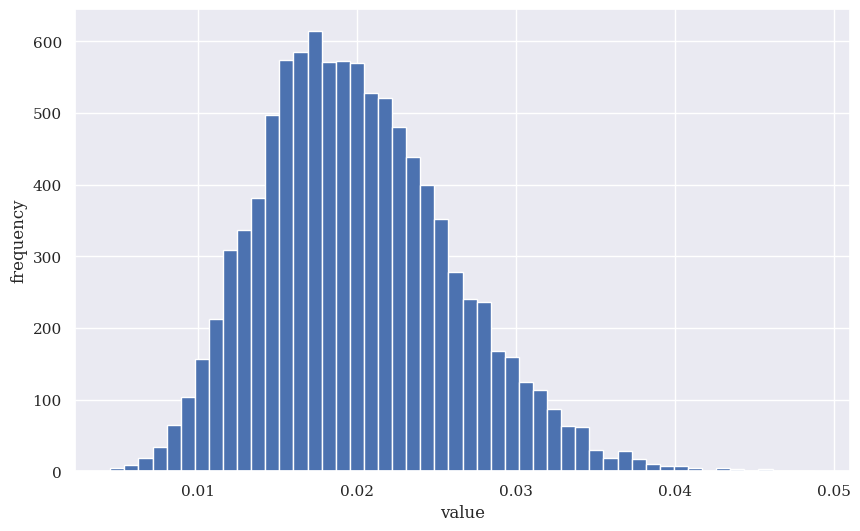

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

Figure below shows the first 10 simulated paths, illustraing the resulting negative average drift (due to $x_0>\theta$) and the convergence to $\theta=0.02$.

Text(0, 0.5, 'index level')

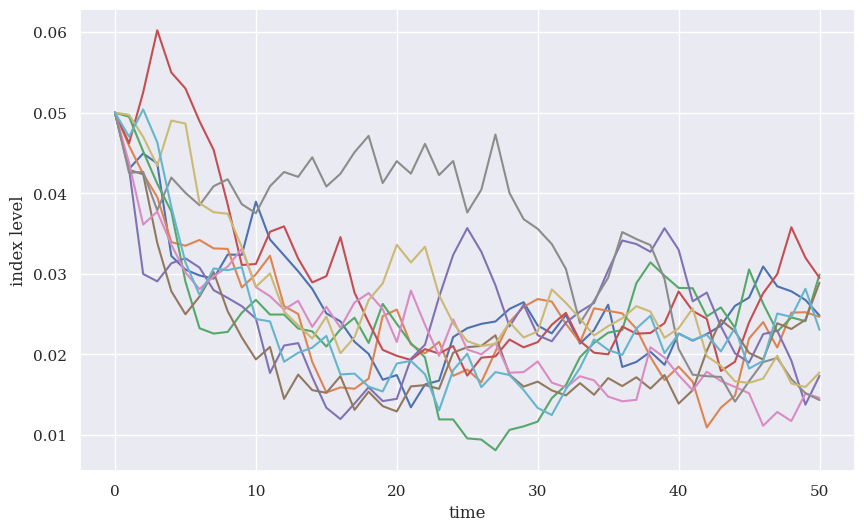

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

Equation below presents the exact discretization scheme for the square-root diffution based on the noncentral chi-square distribution $x_d'^2$ with $df=\frac{4\theta \kappa}{\sigma^2}$ degree of freedom and noncetrality parameter $nc=\frac{4\kappa e^{-\kappa\triangle t}}{\sigma^2(1-e^{-\kappa\triangle t})}x_S$.

<b>Exact discretization for square-root diffusion</b>

$$x_t=\frac{\sigma^2(1-e^{-\kappa\triangle t})}{4\kappa}x_d'^2\left(\frac{4\kappa e^{-\kappa\triangle t}}{\sigma^2(1-e^{-\kappa\triangle t})}x_S\right)$$

In [30]:
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    for t in range(1, M + 1):
        df = 8 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x[t - 1]
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    
    return x

x2 = srd_exact()


Text(0, 0.5, 'frequency')

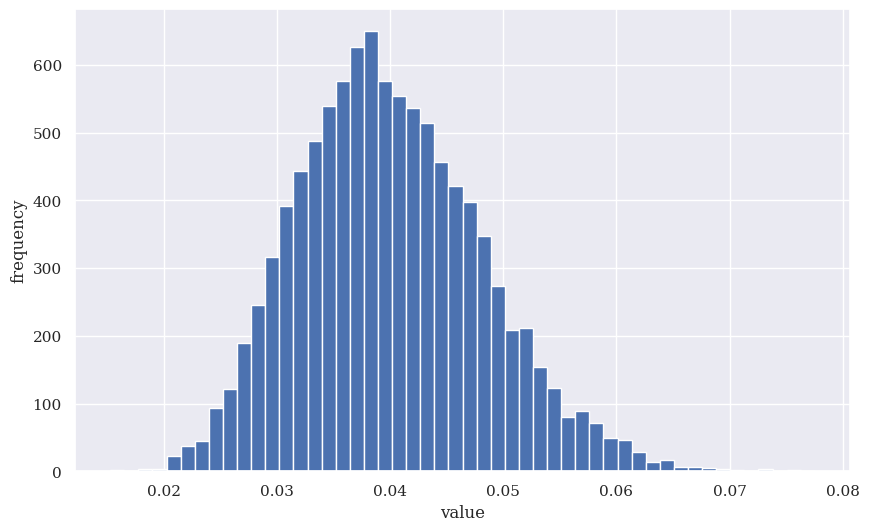

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

Figure below presents the first 10 simulatged paths, again displaying the negative average drift and the convergence to $\theta$.

Text(0, 0.5, 'index level')

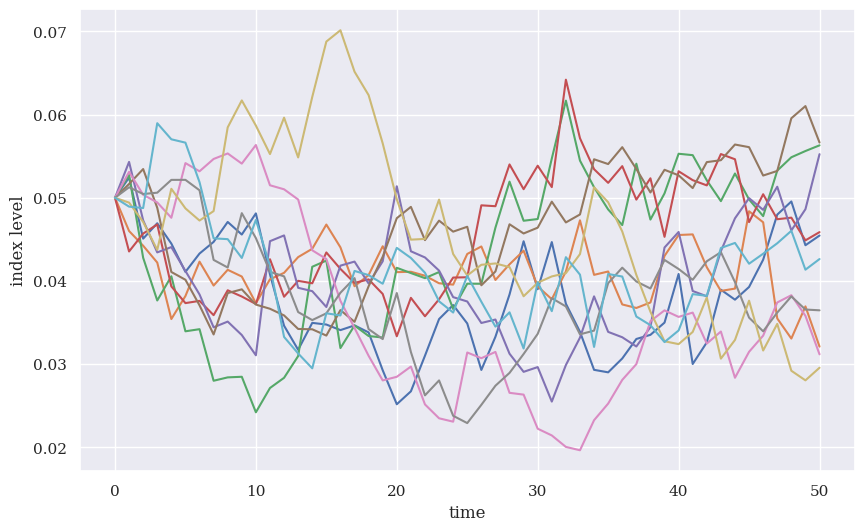

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

In [34]:
print_statistics(x1[-1], x2[-1])

    statistics     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.005          0.015
           max          0.049          0.078
          mean          0.020          0.040
           std          0.006          0.008
          skew          0.494          0.396
      kurtosis          0.228          0.146


Comparing the main statistics from the different approaces reveals that the biased Euler scheme indeed performs quite well when it comes to the desired statistical properties.

In [35]:
I = 250000
%time x1 = srd_euler()

CPU times: user 475 ms, sys: 53.6 ms, total: 528 ms
Wall time: 549 ms


In [36]:
%time x2 = srd_exact()

CPU times: user 997 ms, sys: 7.04 ms, total: 1 s
Wall time: 1 s


In [37]:
print_statistics(x1[-1], x2[-1])

    statistics     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.002          0.013
           max          0.071          0.087
          mean          0.020          0.040
           std          0.006          0.008
          skew          0.562          0.406
      kurtosis          0.487          0.256


A mjor difference can be obeserved in terms of execution speed, since sampling from the noncentral chi-square distribution is more computationally demanding than from the standard normal distribution.

#### Stochastic volatility